In [1]:
import sys
sys.path.insert(0, '../../../network')
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule, set_connectivity 
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

### Initialization

In [2]:
params = np.load("./ctx_str_params.npz", allow_pickle=True) 
N, sequences, patterns, cp, cw, A = params['N'], params['sequences'], params['patterns'], params['cp'], params['cw'], params['A']

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8)

# populations
ctx = Population(N=N[0], tau=1e-2, phi=phi, name='ctx')
d1 = Population(N=N[1], tau=1e-2, phi=phi, name='d1')
# d2 = Population(N=N[2], tau=1e-2, phi=phi, name='d2')

J = set_connectivity([ctx, d1], cp, cw, A, patterns, plasticity)
# synapse = LinearSynapse(J[0][1].K, 1.5)
# J[0][1].update_sequences(patterns[0][0][1], patterns[1][0][2], synapse.h_EE, plasticity.f, plasticity.g)
# J[0][1].update_sequences(patterns[0][0][0], patterns[1][0][1], synapse.h_EE, plasticity.f, plasticity.g)
network = RateNetwork([ctx, d1], J, formulation=4, disable_pbar=False)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Building connections from ctx to d1
INFO:connectivity:Building connections from d1 to ctx
INFO:connectivity:Building connections from d1 to d1


### Simulation

In [4]:
init_inputs = [np.zeros(ctx.size),
               np.zeros(d1.size)]
input_patterns = [p[0] for p in patterns]

T=10 #ms
mouse = ReachingTask()
network.simulate_learning(mouse, T, init_inputs, input_patterns, plasticity, 
                          delta_t=40, eta=0.05, tau_e=1500, lamb=0.6, 
                          noise=[0.25,0.13,0.13], e_bl = [0.06,0.03,0.04,0.07], # [0.06,0.016,0.04,0.07]
                          alpha=0, gamma=0, adap=0, env=2.4, etrace=False,  
                          r_ext=[lambda t:0, lambda t: .5], print_output=True, track=False)

INFO:network:Integrating network dynamics
  1%|▏         | 128/9999 [00:02<01:32, 106.76it/s]

null-->reach
reach-->lick


  3%|▎         | 279/9999 [00:03<00:44, 218.59it/s]

lick-->scavenge


  4%|▍         | 380/9999 [00:03<00:39, 241.22it/s]

scavenge-->aim


  5%|▌         | 505/9999 [00:04<00:39, 238.61it/s]

aim-->reach


  6%|▌         | 580/9999 [00:04<00:38, 243.40it/s]

Mouse drank water None 0
reach-->lick


  7%|▋         | 705/9999 [00:05<00:37, 247.23it/s]

lick-->scavenge


  8%|▊         | 832/9999 [00:05<00:36, 249.25it/s]

scavenge-->aim


  9%|▉         | 910/9999 [00:05<00:36, 250.88it/s]

aim-->reach


 10%|█         | 1013/9999 [00:06<00:36, 248.92it/s]

Mouse drank water None 0
reach-->lick


 11%|█         | 1115/9999 [00:06<00:38, 233.68it/s]

lick-->scavenge


 12%|█▏        | 1241/9999 [00:07<00:36, 241.40it/s]

scavenge-->aim


 14%|█▎        | 1367/9999 [00:07<00:34, 247.61it/s]

aim-->reach


 14%|█▍        | 1443/9999 [00:08<00:34, 248.85it/s]

Mouse drank water None 0
reach-->lick


 16%|█▌        | 1570/9999 [00:08<00:33, 248.69it/s]

lick-->scavenge


 17%|█▋        | 1671/9999 [00:09<00:34, 243.49it/s]

scavenge-->aim


 18%|█▊        | 1770/9999 [00:09<00:34, 238.69it/s]

aim-->reach


 18%|█▊        | 1844/9999 [00:09<00:34, 237.31it/s]

Mouse drank water None 0
reach-->lick


 20%|█▉        | 1971/9999 [00:10<00:32, 246.66it/s]

lick-->scavenge


 21%|██        | 2073/9999 [00:10<00:31, 249.34it/s]

scavenge-->aim


 22%|██▏       | 2174/9999 [00:11<00:32, 239.98it/s]

aim-->reach


 23%|██▎       | 2271/9999 [00:11<00:34, 226.89it/s]

Mouse drank water None 0
reach-->lick


 24%|██▍       | 2395/9999 [00:12<00:32, 236.68it/s]

lick-->scavenge


 25%|██▍       | 2495/9999 [00:12<00:30, 243.88it/s]

scavenge-->aim


 26%|██▋       | 2647/9999 [00:13<00:29, 248.46it/s]

aim-->reach


 27%|██▋       | 2723/9999 [00:13<00:29, 247.08it/s]

Mouse drank water None 0
reach-->lick


 28%|██▊       | 2826/9999 [00:13<00:28, 250.07it/s]

lick-->scavenge


 29%|██▉       | 2928/9999 [00:14<00:28, 249.15it/s]

scavenge-->aim


 31%|███       | 3055/9999 [00:14<00:27, 248.25it/s]

aim-->reach


 31%|███▏      | 3131/9999 [00:15<00:27, 248.53it/s]

Mouse drank water None 0
reach-->lick


 33%|███▎      | 3258/9999 [00:15<00:26, 250.21it/s]

lick-->scavenge


 34%|███▎      | 3359/9999 [00:15<00:26, 247.97it/s]

scavenge-->aim


 35%|███▍      | 3460/9999 [00:16<00:27, 239.87it/s]

aim-->reach


 35%|███▌      | 3535/9999 [00:16<00:26, 243.70it/s]

Mouse drank water None 0
reach-->lick


 37%|███▋      | 3662/9999 [00:17<00:25, 248.38it/s]

lick-->scavenge


 38%|███▊      | 3761/9999 [00:17<00:26, 238.71it/s]

scavenge-->aim


 39%|███▊      | 3862/9999 [00:18<00:25, 236.06it/s]

aim-->reach


 39%|███▉      | 3936/9999 [00:18<00:25, 241.09it/s]

Mouse drank water None 0
reach-->lick


 41%|████      | 4061/9999 [00:18<00:24, 245.58it/s]

lick-->scavenge


 42%|████▏     | 4161/9999 [00:19<00:24, 236.27it/s]

scavenge-->aim


 43%|████▎     | 4283/9999 [00:19<00:24, 236.46it/s]

aim-->reach


 44%|████▍     | 4382/9999 [00:20<00:23, 239.72it/s]

Mouse drank water None 0
reach-->lick


 45%|████▍     | 4483/9999 [00:20<00:22, 245.90it/s]

lick-->scavenge


 46%|████▌     | 4609/9999 [00:21<00:21, 247.93it/s]

scavenge-->aim


 47%|████▋     | 4708/9999 [00:21<00:22, 232.42it/s]

aim-->reach


 48%|████▊     | 4784/9999 [00:21<00:21, 242.38it/s]

Mouse drank water None 0
reach-->lick


 49%|████▉     | 4885/9999 [00:22<00:20, 246.73it/s]

lick-->scavenge


 50%|█████     | 5013/9999 [00:22<00:20, 248.06it/s]

scavenge-->aim


 51%|█████     | 5116/9999 [00:23<00:19, 249.39it/s]

aim-->reach


 52%|█████▏    | 5192/9999 [00:23<00:19, 248.62it/s]

Mouse drank water None 0
reach-->lick


 53%|█████▎    | 5292/9999 [00:23<00:19, 246.80it/s]

lick-->scavenge


 54%|█████▍    | 5418/9999 [00:24<00:18, 247.35it/s]

scavenge-->aim


 55%|█████▌    | 5519/9999 [00:24<00:18, 247.90it/s]

aim-->reach


 56%|█████▌    | 5595/9999 [00:25<00:17, 248.56it/s]

Mouse drank water None 0
reach-->lick


 57%|█████▋    | 5720/9999 [00:25<00:17, 240.56it/s]

lick-->scavenge


 58%|█████▊    | 5847/9999 [00:26<00:16, 247.75it/s]

scavenge-->aim


 59%|█████▉    | 5948/9999 [00:26<00:16, 239.23it/s]

aim-->reach


 60%|██████    | 6024/9999 [00:26<00:16, 245.67it/s]

Mouse drank water None 0
reach-->lick


 61%|██████▏   | 6149/9999 [00:27<00:15, 243.51it/s]

lick-->scavenge


 63%|██████▎   | 6251/9999 [00:27<00:15, 248.17it/s]

scavenge-->aim


 64%|██████▍   | 6376/9999 [00:28<00:14, 248.07it/s]

aim-->reach


 65%|██████▍   | 6451/9999 [00:28<00:14, 247.58it/s]

Mouse drank water None 0
reach-->lick


 66%|██████▌   | 6577/9999 [00:29<00:13, 247.93it/s]

lick-->scavenge


 67%|██████▋   | 6677/9999 [00:29<00:14, 237.02it/s]

scavenge-->aim


 68%|██████▊   | 6803/9999 [00:30<00:13, 244.37it/s]

aim-->reach


 69%|██████▉   | 6878/9999 [00:30<00:12, 245.97it/s]

Mouse drank water None 0
reach-->lick


 70%|███████   | 7005/9999 [00:30<00:12, 247.66it/s]

lick-->scavenge


 71%|███████   | 7108/9999 [00:31<00:11, 249.52it/s]

scavenge-->aim


 72%|███████▏  | 7209/9999 [00:31<00:11, 246.63it/s]

aim-->reach


 73%|███████▎  | 7309/9999 [00:32<00:11, 241.80it/s]

Mouse drank water None 0
reach-->lick


 74%|███████▍  | 7410/9999 [00:32<00:10, 245.58it/s]

lick-->scavenge


 75%|███████▌  | 7511/9999 [00:32<00:10, 247.23it/s]

scavenge-->aim


 76%|███████▋  | 7637/9999 [00:33<00:09, 246.49it/s]

aim-->reach


 77%|███████▋  | 7713/9999 [00:33<00:09, 247.47it/s]

Mouse drank water None 0
reach-->lick


 78%|███████▊  | 7814/9999 [00:34<00:08, 247.30it/s]

lick-->scavenge


 79%|███████▉  | 7940/9999 [00:34<00:08, 246.23it/s]

scavenge-->aim


 81%|████████  | 8068/9999 [00:35<00:07, 249.90it/s]

aim-->reach


 81%|████████▏ | 8144/9999 [00:35<00:07, 249.00it/s]

Mouse drank water None 0
reach-->lick


 83%|████████▎ | 8271/9999 [00:36<00:06, 248.85it/s]

lick-->scavenge


 84%|████████▍ | 8397/9999 [00:36<00:06, 245.74it/s]

scavenge-->aim


 85%|████████▌ | 8521/9999 [00:37<00:06, 235.30it/s]

aim-->reach


 86%|████████▌ | 8597/9999 [00:37<00:05, 245.93it/s]

Mouse drank water None 0
reach-->lick


 87%|████████▋ | 8723/9999 [00:37<00:05, 247.57it/s]

lick-->scavenge


 88%|████████▊ | 8849/9999 [00:38<00:04, 248.07it/s]

scavenge-->aim


 90%|████████▉ | 8951/9999 [00:38<00:04, 250.04it/s]

aim-->reach


 90%|█████████ | 9029/9999 [00:39<00:03, 250.37it/s]

Mouse drank water None 0
reach-->lick


 91%|█████████▏| 9130/9999 [00:39<00:03, 247.91it/s]

lick-->scavenge


 92%|█████████▏| 9231/9999 [00:39<00:03, 247.06it/s]

scavenge-->aim


 94%|█████████▎| 9357/9999 [00:40<00:02, 246.89it/s]

aim-->reach


 95%|█████████▍| 9457/9999 [00:40<00:02, 238.37it/s]

Mouse drank water None 0
reach-->lick


 96%|█████████▌| 9557/9999 [00:41<00:01, 244.38it/s]

lick-->scavenge


 97%|█████████▋| 9659/9999 [00:41<00:01, 247.96it/s]

scavenge-->aim


 98%|█████████▊| 9759/9999 [00:42<00:00, 246.85it/s]

aim-->reach


 98%|█████████▊| 9835/9999 [00:42<00:00, 246.36it/s]

Mouse drank water None 0
reach-->lick


100%|█████████▉| 9957/9999 [00:42<00:00, 234.68it/s]

lick-->scavenge


100%|██████████| 9999/9999 [00:43<00:00, 231.22it/s]


In [8]:
mouse.evars

array([[ 0.        ,  0.00024   ,  0.00043582, ...,  0.01613301,
         0.01543067,  0.        ],
       [ 0.        ,  0.00012   ,  0.00024006, ..., -0.0098864 ,
        -0.00971589,  0.        ],
       [ 0.        ,  0.00016   ,  0.0003199 , ..., -0.01936247,
        -0.01911404,  0.        ],
       [ 0.        ,  0.00028   ,  0.00053532, ..., -0.02800391,
        -0.02781645,  0.        ]])

### Results

In [11]:
overlaps_ctx = sequences[0][0].overlaps(network.pops[0])
overlaps_d1 = sequences[1][0].overlaps(network.pops[1])
# overlaps_d2 = sequences[2][0].overlaps(network.pops[2])
filename = 'simulation-test'
np.savez('/work/jp464/striatum-sequence/' + 'figure' + '.npz', 
         overlaps_ctx=overlaps_ctx, overlaps_d1=overlaps_d1, 
         state_ctx=network.pops[0].state, state_d1=network.pops[1].state,
         evars=mouse.evars)

INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 93.50it/s]
INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 96.80it/s]


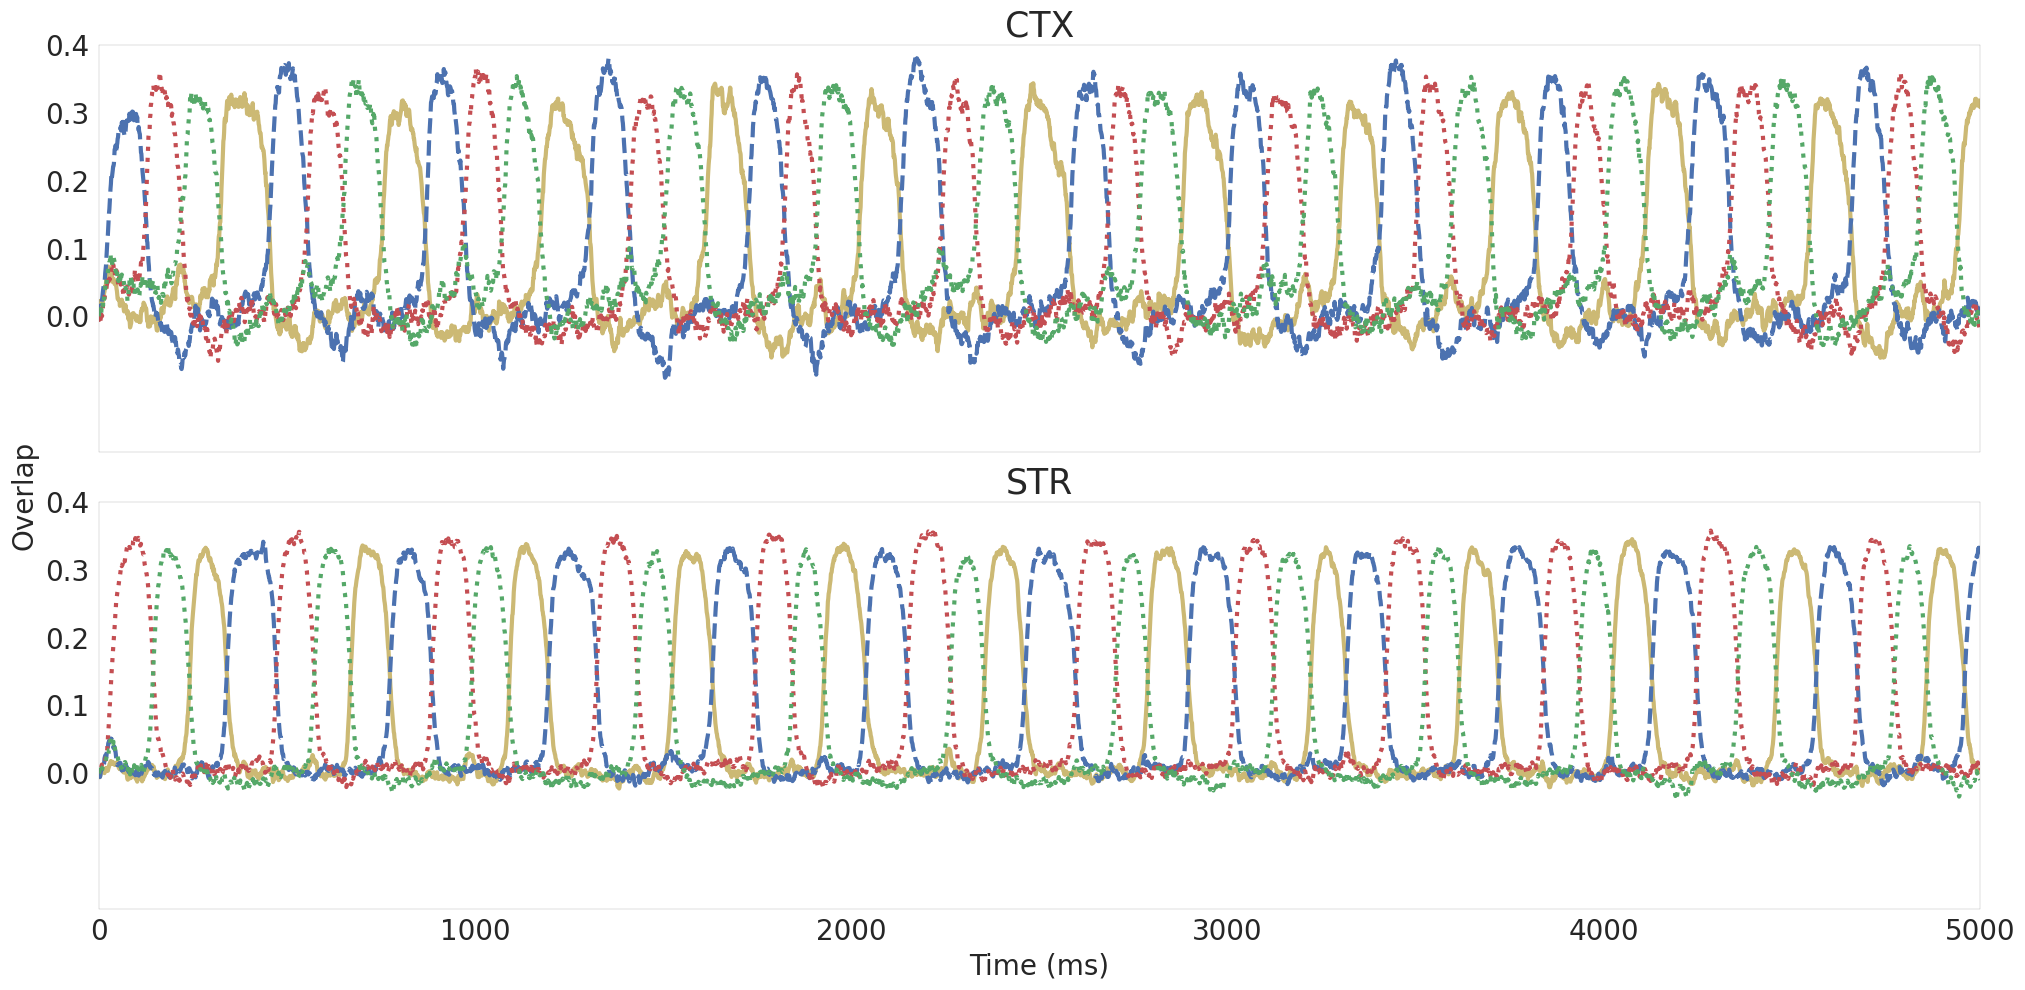

In [6]:
# Set font family globally
sns.set_style('white') 
colors = sns.color_palette('deep')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams['axes.linewidth'] = 0.1

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, tight_layout=True, figsize=(20,10))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=3, color=colors[8], label='Aim')
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=3, color=colors[0], label='Reach')
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=3, color=colors[3], label='Lick')
axes[0].plot(overlaps_ctx[3], linestyle='dotted', linewidth=3, color=colors[2], label='Scavenge')
# axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
# axes.set_xlabel('Time (ms)', fontsize=20)
axes[1].plot(overlaps_d1[0], linestyle='solid', linewidth=3, color=colors[8])
axes[1].plot(overlaps_d1[1], linestyle='dashed', linewidth=3, color=colors[0])
axes[1].plot(overlaps_d1[2], linestyle='dotted', linewidth=3, color=colors[3])
axes[1].plot(overlaps_d1[3], linestyle='dotted', linewidth=3, color=colors[2])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("STR", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
axes[1].set_xlabel('Time (ms)', fontsize=20)

fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 5000))
plt.setp(axes, ylim=(-.2, .4))
# plt.figlegend(fontsize=20, loc='upper right')
# plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.savefig('/work/jp464/striatum-sequence/output/simulation-online-learning-control.jpg', bbox_inches = "tight", format='jpg')

plt.show()


In [7]:
def temporal_diff(A, B, max_iter):
    sum = 0
    cnt = 0
    for i in range(len(A)):
        if i == 0: continue
        if B[i+1] == None:
            break
        diff = B[i+1][1] - A[i][1]
        sum += (diff)
        cnt += 1
    return sum / cnt

temporal_diff(mouse.behaviors[0], mouse.behaviors[1], 100)

125.7127659574468